In [1]:
import matplotlib.pyplot as plt
import numpy as np

interpolation = 100
interpolation_step = 1.0 / interpolation

# Simulate and Test possible interpolation methods

# Interpolation is used when creating a path between start and goal position

# Because the original trajectory resolution is very low, these methods 
# are necessary to ensure a smooth reference for the MPC Planner to follow

# http://paulbourke.net/miscellaneous/interpolation/

In [2]:
# Interpolation functions

def linearInterpolation(p1, p2, alpha):
    result_x = p1[0] + alpha * (p2[0] - p1[0])
    result_y = p1[1] + alpha * (p2[1] - p1[1])
    
    return np.array([result_x, result_y])

def catmullInterpolation(p0, p1, p2, p3, alpha):
    alpha2 = alpha * alpha
    alpha3 = alpha * alpha2
    
    a0x = -0.5*p0[0] + 1.5*p1[0] - 1.5*p2[0] + 0.5*p3[0]
    a1x = p0[0] - 2.5*p1[0] + 2*p2[0] - 0.5*p3[0]
    a2x = -0.5*p0[0] + 0.5*p2[0]
    a3x = p1[0]
    
    a0y = -0.5*p0[1] + 1.5*p1[1] - 1.5*p2[1] + 0.5*p3[1]
    a1y = p0[1] - 2.5*p1[1] + 2*p2[1] - 0.5*p3[1]
    a2y = -0.5*p0[1] + 0.5*p2[1]
    a3y = p1[1]
    
    result_x = a0x * alpha3 + a1x * alpha2 + a2x * alpha + a3x
    result_y = a0y * alpha3 + a1y * alpha2 + a2y * alpha + a3y
    
    return np.array([result_x, result_y])

def hermiteInterpolation(p0, p1, p2, p3, alpha, bias, tension):
    alpha2 = alpha * alpha
    alpha3 = alpha * alpha2
    
    bias_pos = (1 + bias) * (1 - tension) / 2.0
    bias_neg = (1 - bias) * (1 - tension) / 2.0 
    
    m0x = (p1[0] - p0[0]) * bias_pos + (p2[0] - p1[0]) * bias_neg
    m1x = (p2[0] - p1[0]) * bias_pos + (p3[0] - p2[0]) * bias_neg
    
    m0y = (p1[1] - p0[1]) * bias_pos + (p2[1] - p1[1]) * bias_neg
    m1y = (p2[1] - p1[1]) * bias_pos + (p3[1] - p2[1]) * bias_neg
        
    a0 = 2.0 * alpha3 - 3.0 * alpha2 + 1.0
    a1 = alpha3 - 2.0 * alpha2 + alpha
    a2 = alpha3 - alpha2
    a3 = -2.0 * alpha3 + 3.0 * alpha2
    
    result_x = a0 * p1[0] + a1 * m0x + a2 * m1x + a3 * p2[0]
    result_y = a0 * p1[1] + a1 * m0y + a2 * m1y + a3 * p2[1]
    
    return np.array([result_x, result_y])

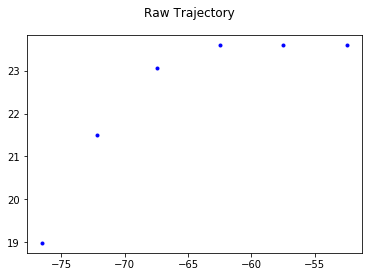

In [3]:
# Raw Trajectory

trajectory = np.array([[-76.50974405121956, 18.983996172613875], [-72.20327570130529, 21.50608006418088], [-67.46265869006888, 23.065928504796503], [-62.5, 23.59375], [-57.5, 23.59375], [-52.5, 23.59375]])

fig = plt.figure()
fig.suptitle('Raw Trajectory')
ax = fig.add_subplot(1, 1, 1)

ax.plot(trajectory[:, 0], trajectory[:, 1], 'b.')

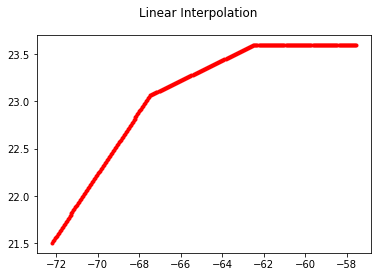

In [4]:
# Linear Interpolation

trajectory_interpolated = np.zeros((0, 2))

for i in range(1, len(trajectory) - 2): 
    for j in range(interpolation):
        point_temp = linearInterpolation(trajectory[i, :], trajectory[i + 1, :], interpolation_step * j)
        trajectory_interpolated = np.vstack((trajectory_interpolated, point_temp))
        
fig = plt.figure()
fig.suptitle('Linear Interpolation')
ax = fig.add_subplot(1, 1, 1)

ax.plot(trajectory_interpolated[:, 0], trajectory_interpolated[:, 1], 'r.')

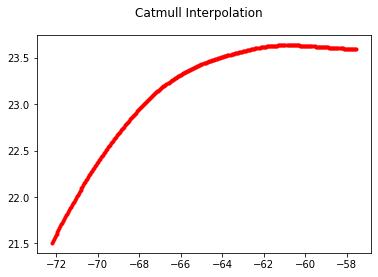

In [5]:
# Catmull Interpolation

trajectory_interpolated = np.zeros((0, 2))

for i in range(1, len(trajectory) - 2): 
    for j in range(interpolation):
        point_temp = catmullInterpolation(trajectory[i-1, :], 
                                          trajectory[i, :], 
                                          trajectory[i+1, :], 
                                          trajectory[i+2, :], 
                                          interpolation_step * j)
        trajectory_interpolated = np.vstack((trajectory_interpolated, point_temp))

fig = plt.figure()
fig.suptitle('Catmull Interpolation')
ax = fig.add_subplot(1, 1, 1)
ax.plot(trajectory_interpolated[:, 0], trajectory_interpolated[:, 1], 'r.')

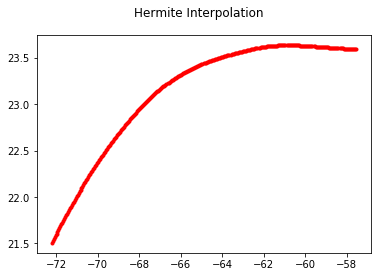

In [6]:
# Hermite Interpolation

bias = 0
tension = 0.0

trajectory_interpolated = np.zeros((0, 2))

for i in range(1, len(trajectory) - 2): 
    for j in range(interpolation):
        point_temp = hermiteInterpolation(trajectory[i-1, :], 
                                          trajectory[i, :], 
                                          trajectory[i+1, :], 
                                          trajectory[i+2, :], 
                                          interpolation_step * j,
                                          bias,
                                          tension)
        trajectory_interpolated = np.vstack((trajectory_interpolated, point_temp))

fig = plt.figure()
fig.suptitle('Hermite Interpolation')
ax = fig.add_subplot(1, 1, 1)
ax.plot(trajectory_interpolated[:, 0], trajectory_interpolated[:, 1], 'r.')